In [12]:
import boto3
import pandas as pd
import sagemaker
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
bucket = 'group15awsprojectbucket'


file_key = 'transformFolder/run-1700444800717-part-r-00000.csv'

# Construct the full S3 path
data_location = 's3://{}/{}'.format(bucket, file_key)

# Read the data into a Pandas DataFrame
df = pd.read_csv(data_location)


df.head()

,deaforhardofhearing,generalhealth,difficultyconcentrating,physicalhealthdays,chestscan,hadskincancer,hivtesting,pneumovaxever,blindorvisiondifficulty,hadkidneydisease,...,haddepressivedisorder,highrisklastyear,raceethnicitycategory,weightinkilograms,smokerstatus,difficultyerrands,hadstroke,hadcopd,hadangina,sleephours
0,No,Very good,No,4.0,No,No,No,Yes,No,No,...,No,No,"White only, Non-Hispanic",71.67,1,No,No,No,No,9.0
1,No,Very good,No,0.0,No,No,No,Yes,No,No,...,No,No,"White only, Non-Hispanic",95.25,1,No,No,No,No,6.0
2,No,Very good,No,0.0,Yes,No,No,Yes,Yes,No,...,No,No,"White only, Non-Hispanic",108.86,1,No,No,No,No,8.0
3,No,Fair,No,5.0,No,Yes,No,Yes,No,No,...,Yes,No,"White only, Non-Hispanic",90.72,0,No,No,No,No,9.0
4,No,Good,No,3.0,No,No,No,Yes,No,No,...,No,No,"White only, Non-Hispanic",79.38,0,No,No,No,No,5.0


In [7]:
df.describe()

,physicalhealthdays,heightinmeters,bmi,mentalhealthdays,weightinkilograms,smokerstatus,sleephours
count,192372.000000,192372.000000,192372.000000,192372.000000,192372.000000,192372.000000,192372.000000
mean,4.159145,1.704134,28.732025,4.116753,83.712744,0.603622,7.028445
std,8.440267,0.106620,6.532323,8.037662,21.407868,0.903312,1.446745
min,0.000000,0.910000,12.020000,0.000000,29.480000,0.000000,1.000000
25%,0.000000,1.630000,24.330000,0.000000,68.040000,0.000000,6.000000
50%,0.000000,1.700000,27.460000,0.000000,81.650000,0.000000,7.000000
75%,3.000000,1.780000,31.930000,4.000000,95.250000,1.000000,8.000000
max,30.000000,2.410000,97.650000,30.000000,292.570000,3.000000,24.000000


In [8]:
df.duplicated().sum()

11

In [9]:
df = df.drop_duplicates()

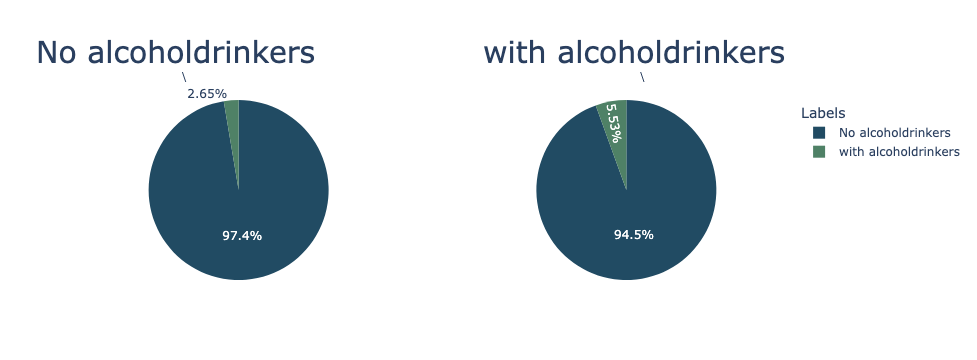

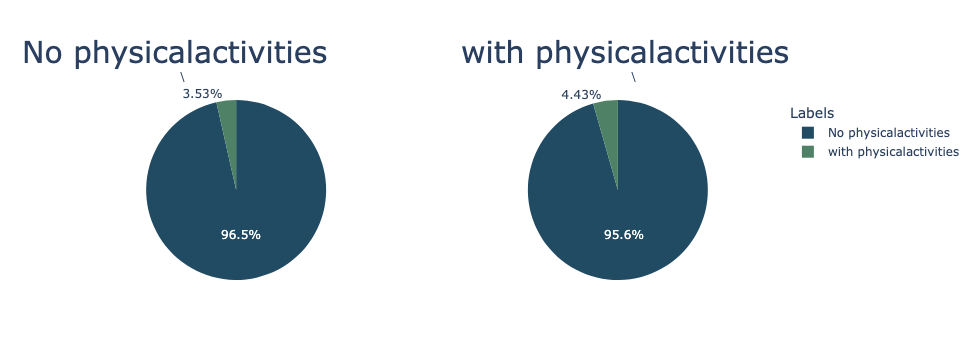

In [19]:
# Define colors for the plot
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']

cols = ['alcoholdrinkers', 'physicalactivities']

# Looping through columns to create pie charts
for i in cols:
    # Filter the DataFrame
    df_yes = df[df[i] == 'Yes']
    df_no = df[df[i] == 'No']
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])
    fig.add_trace(
        go.Pie(values=df_no.highrisklastyear.value_counts().values, 
               labels=[f'No {i}', f'with {i}'],
               marker_colors=irises_colors),
        row=1, col=1
    )
    fig.add_trace(
        go.Pie(values=df_yes.highrisklastyear.value_counts().values, 
               labels=[f'No {i}', f'with {i}'],
               marker_colors=irises_colors),
        row=1, col=2
    )
    fig.update_layout(
        legend_title="Labels",
        annotations=[
            dict(text=f'No {i}', x=0.15, y=1.10, font_size=30),
            dict(text=f'with {i}', x=0.80, y=1.10, font_size=30)
        ]
    )
    fig.show()


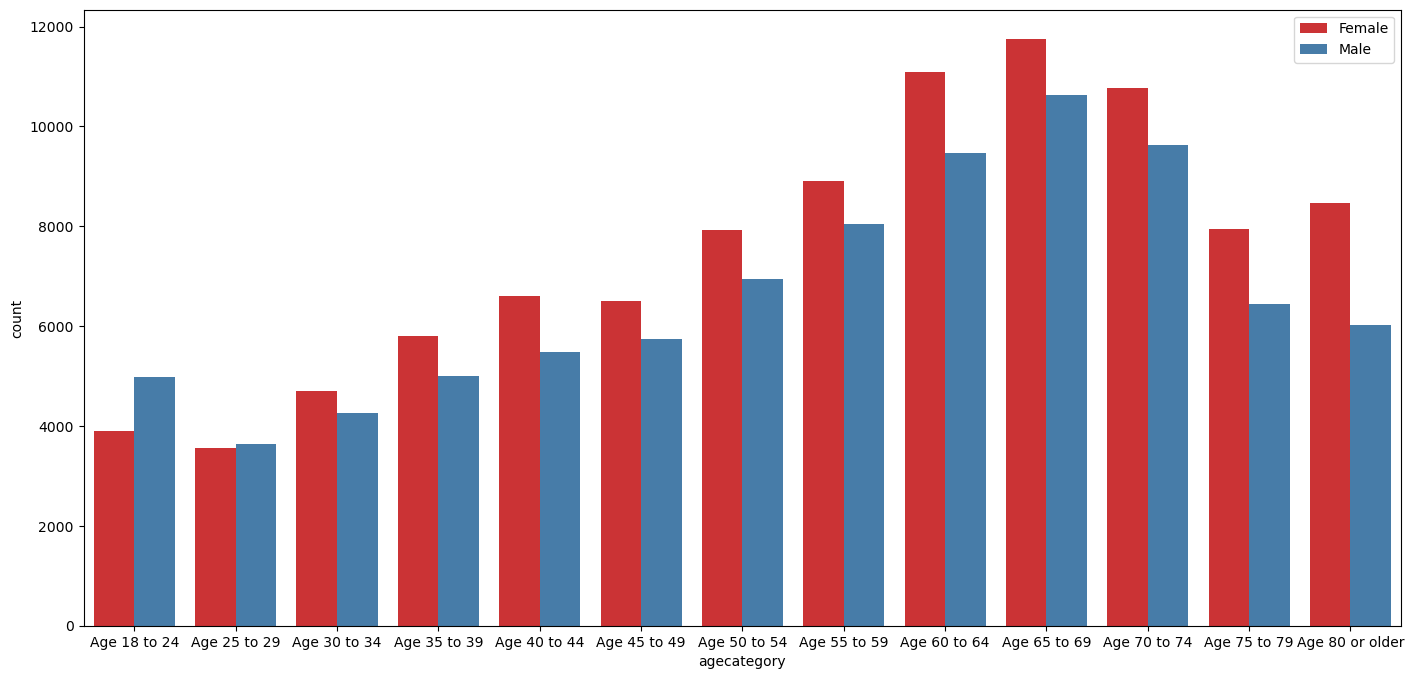

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
order = pd.unique(df.agecategory.values)
order.sort()
plt.figure(figsize = (17,8))
sns.countplot(data=df[df['highrisklastyear']=='No'], x='agecategory', hue='gender', palette='Set1', order=order)
plt.legend(['Female','Male'])
plt.show()

/tmp/ipykernel_8634/535443701.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='highrisklastyear', ylabel='count'>

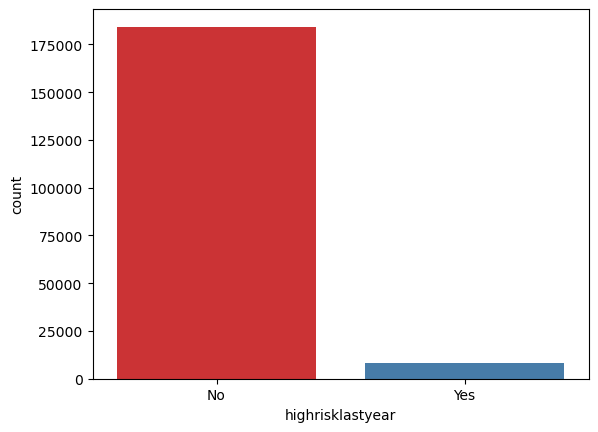

In [35]:
sns.countplot(data=df,x='highrisklastyear',palette='Set1')

In [44]:
from sklearn.preprocessing import LabelEncoder
df1=df
cols = ['highrisklastyear', 'smokerstatus', 'alcoholdrinkers','hadstroke','difficultywalking','gender','agecategory','raceethnicitycategory','haddiabetes','physicalactivities','checkuphistory','hadasthma','hadkidneydisease','hadskincancer']
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)

In [45]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 7.9 MB/s eta 0:00:00


In [60]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 897.5 kB/s eta 0:00:0000:0100:01


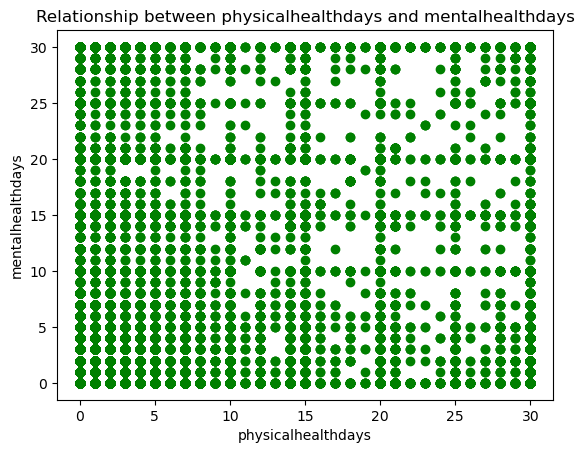

In [78]:
plt.scatter(df['physicalhealthdays'], df['mentalhealthdays'], color='green')
plt.title('Relationship between physicalhealthdays and mentalhealthdays')
plt.xlabel('physicalhealthdays')
plt.ylabel('mentalhealthdays')
plt.show()

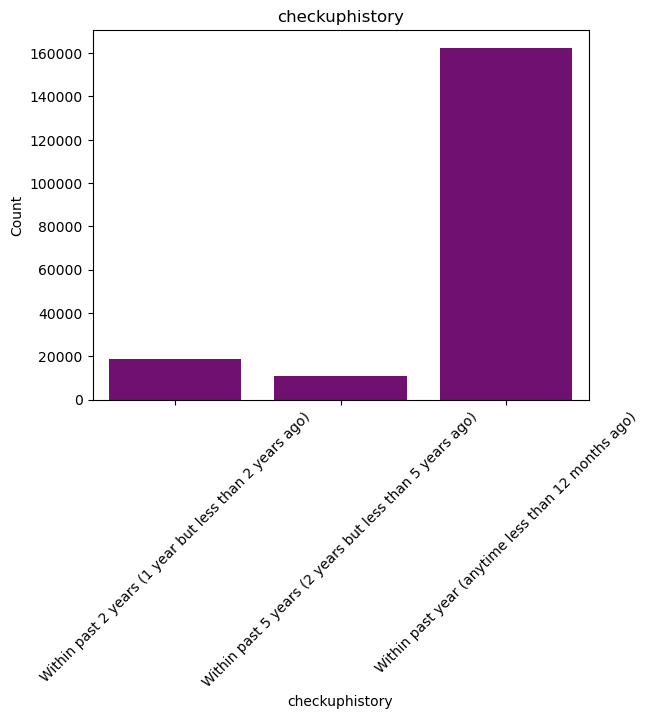

In [79]:
category_order = sorted(df['checkuphistory'].unique())

sns.countplot(x='checkuphistory', data=df, order=category_order, color='purple')
plt.title('checkuphistory')
plt.xlabel('checkuphistory')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Within past 2 years (1 year but less than 2 years ago)', 'Within past 5 years (2 years but less than 5 years ago)', 'Within past year (anytime less than 12 months ago)'])
plt.xticks(rotation=45)
plt.show()

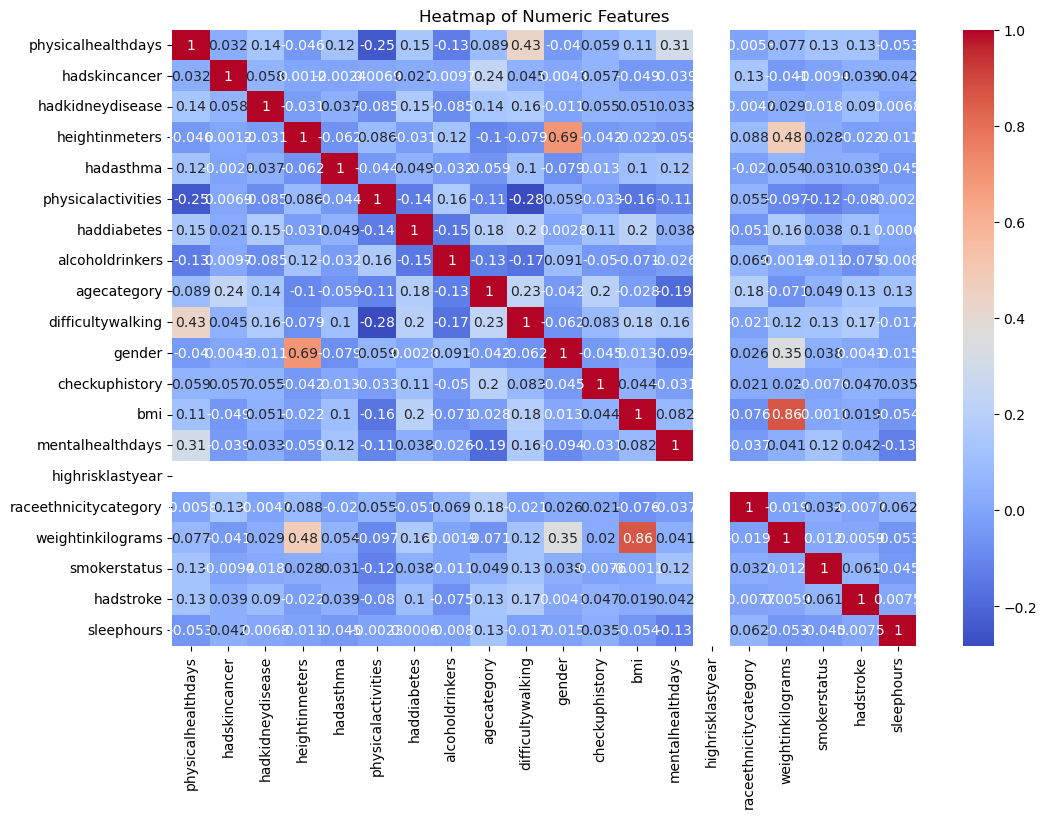

In [77]:
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap of Numeric Features")
plt.show()